## install visionlens

In [1]:
!rm -rf /kaggle/working/*
# !rm -rf /kaggle/working/visionlens
!git clone https://github.com/SKT27182/VisionLens.git
!mv  /kaggle/working/VisionLens/* .

Cloning into 'VisionLens'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 192 (delta 99), reused 150 (delta 60), pack-reused 0 (from 0)
Receiving objects: 100% (192/192), 3.43 MiB | 26.82 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [2]:
!pip3 install einops==0.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.0 MB/s eta 0:00:00


### import models

In [1]:
from visionlens.models import InceptionV1

model = InceptionV1().eval()

# you can import other models and weights as well
from visionlens.models import resnet50, ResNet50_Weights

ModuleNotFoundError: No module named 'visionlens'

### import Hooks and Objectives

In [4]:
from visionlens.objectives import Objective, Hook

In [5]:
# create a objective function which takes hooks and returns the loss

def channel_objective(hooks):

    return -hooks("mixed4a")[:, 6, :, :].mean()


obj = Objective(channel_objective, name="mixed4a:6")

### add hooks to the model

In [6]:
## add hook to particular layer only for the objective, you can add hook to whole model too

In [7]:
mixed4a = model.get_submodule("mixed4a")

In [8]:
# now add the hook to mixed4a layer
hooks = Hook(mixed4a)

In [9]:
hooks.module, hooks.features, hooks.hook

(CatLayer(), None, <torch.utils.hooks.RemovableHandle at 0x7b482124d780>)

In [10]:
# for keeping the things same, we will convert this hook to Dict[str, Hook]

hooks_ = lambda x: (
    hooks.features if x == "mixed4a" else None
)  # Now we can call hooks("mixed4a") to get the actual activations

## generate_random_img

In [11]:
from visionlens.images import get_images

2024-10-20 11:35:54 - 6664 - visionlens.img_utils.display_images_in_table:127 - INFO - Displaying 1 images in a table.


""

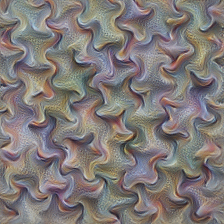

2024-10-20 11:35:54 - 6664 - visionlens.optimize.visualize:182 - INFO - Epoch 50/51 - Loss: -2453.5361328125
2024-10-20 11:35:54 - 6664 - visionlens.img_utils.display_images_in_table:127 - INFO - Displaying 1 images in a table.


torch.Size([11, 1, 3, 224, 224])


""

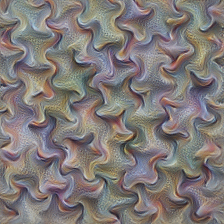

In [ ]:
images = viz.visualize(lr=0.05, freq=10, threshold=(513))

In [12]:
param_func = lambda: get_images(
    w=244
)  # returns parameters of an image which will be updated and
# callable function which returns the image

In [13]:
from visionlens.optimize import Visualizer

In [14]:
viz = Visualizer(model, obj, hooks_)

TypeError: Subscripted generics cannot be used with class and instance checks

In [21]:
viz.visualize(param_func)

NameError: name 'viz' is not defined